In [1]:
import pandas as pd

print("test")

test


In [2]:
import torch

In [3]:
print(torch.__version__)

1.11.0


In [4]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.8310, 0.5299, 0.8717],
        [0.2276, 0.0092, 0.7354],
        [0.6660, 0.4189, 0.6914],
        [0.5046, 0.2133, 0.8081],
        [0.9164, 0.9270, 0.3403]])


In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
numpy_X = trainset.data
numpy_y = np.asarray(trainset.targets)

Files already downloaded and verified
Files already downloaded and verified


In [27]:
numpy_X = trainset.data
numpy_y = trainset.targets

(50000, 32, 32, 3)

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

NameError: name 'trainloader' is not defined

In [16]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [17]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [19]:
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

/Users/colins/.cache/torch/hub/pytorch_vision_main/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")
/Users/colins/.cache/torch/hub/pytorch_vision_main/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


[1,  2000] loss: 2.178
[1,  4000] loss: 1.816
[1,  6000] loss: 1.642
[1,  8000] loss: 1.567
[1, 10000] loss: 1.524
[1, 12000] loss: 1.479


/Users/colins/.cache/torch/hub/pytorch_vision_main/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")
/Users/colins/.cache/torch/hub/pytorch_vision_main/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


[2,  2000] loss: 1.409
[2,  4000] loss: 1.357
[2,  6000] loss: 1.326
[2,  8000] loss: 1.330
[2, 10000] loss: 1.298
[2, 12000] loss: 1.296


In [20]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

torch.Size([1, 3, 32, 32])
tensor(194, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)


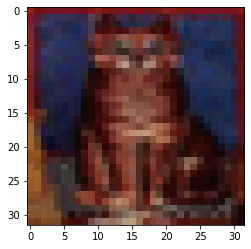

In [12]:
#test deepaug image generator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torchvision
import torch
from deepaugment.image_generator import deepaugment_image_generator
from deepaugment.image_generator import load_k_policies_from_csv

policies_df = pd.read_csv('deepaug_policies.csv')
policies_list = load_k_policies_from_csv(policies_df, k=20)
image_gen = deepaugment_image_generator(numpy_X, numpy_y, policies_list, batch_size=1)

# functions to show an image
def imshow(img):
    #img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
images, labels = next(image_gen)
#images, labels = next(image_gen)
images_tensor = torch.from_numpy(images)


images_tensor.size()
permuted_tensor = torch.permute(images_tensor,(0,3,1,2))
print(permuted_tensor.shape)
print(permuted_tensor[0].max())
print(permuted_tensor[0].min())
# print images
imshow(torchvision.utils.make_grid(permuted_tensor))



In [13]:
def show_image_grid(X, y=None, y_pred=None, title=None, nrow=6, ncol=4, **kwargs):
    max_num = nrow*ncol
    X = X[:max_num]
    if len(X) < max_num:
        ncol = len(X) // nrow + 1
    if isinstance(X, np.ndarray):
        X = torch.from_numpy(X)
    if X.dim() != 4:
        X = X[:, None]

    plt.figure(title, figsize=(2*nrow, 2*ncol + (0 if y is None else 1)))
    if title:
        plt.suptitle(title)

    plt.gray()

    if isinstance(y, torch.Tensor):
        y = y.numpy()

    for i, Xi in enumerate(X):
        plt.subplot(ncol, nrow, i+1)
        img = Xi.numpy().transpose((1, 2, 0))
        if img.shape[2] == 1:
            img = img[..., 0]
        plt.imshow(img)

        title = ""
        if y is not None:
          title += str(int(y[i]))
        if y_pred is not None:
          title += "/" + str(int(y_pred[i]))
        if len(title) > 0:
          plt.title(title)

        plt.axis('off')

    plt.axis('off')

In [15]:
plt.imshow(images[20].astype(np.uint8))

IndexError: index 20 is out of bounds for axis 0 with size 1

tensor(248, dtype=torch.int32)
tensor(29, dtype=torch.int32)


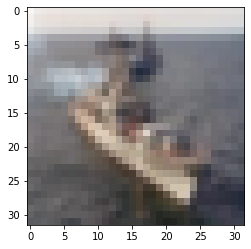

In [8]:
print(permuted_tensor[5].max())
print(permuted_tensor[5].min())
imshow(permuted_tensor[5])

In [23]:
PATH = './cifar_net.pth'
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [24]:
outputs = net(images)

In [25]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  cat   ship  plane plane


In [26]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

/Users/colins/.cache/torch/hub/pytorch_vision_main/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")
/Users/colins/.cache/torch/hub/pytorch_vision_main/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


Accuracy of the network on the 10000 test images: 53 %


In [27]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

/Users/colins/.cache/torch/hub/pytorch_vision_main/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")
/Users/colins/.cache/torch/hub/pytorch_vision_main/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


Accuracy for class: plane is 69.7 %
Accuracy for class: car   is 47.7 %
Accuracy for class: bird  is 46.0 %
Accuracy for class: cat   is 40.4 %
Accuracy for class: deer  is 54.7 %
Accuracy for class: dog   is 40.2 %
Accuracy for class: frog  is 64.2 %
Accuracy for class: horse is 51.1 %
Accuracy for class: ship  is 67.7 %
Accuracy for class: truck is 56.0 %


In [29]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [30]:
net.to(device)
inputs, labels = data[0].to(device), data[1].to(device)

In [1]:
from torch.optim.lr_scheduler import OneCycleLR


In [2]:
import torchvision
from pl_bolts.transforms.dataset_normalizations import cifar10_normalization

train_transforms = torchvision.transforms.Compose(
    [
        torchvision.transforms.RandomCrop(32, padding=4),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        cifar10_normalization(),
    ]
)

In [3]:
train_transforms

Compose(
    RandomCrop(size=(32, 32), padding=4)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.4913725490196078, 0.4823529411764706, 0.4466666666666667], std=[0.24705882352941178, 0.24352941176470588, 0.2615686274509804])
)

In [4]:
train_transforms.transforms.append(torchvision.transforms.RandomCrop(32, padding=4))

In [5]:
train_transforms

Compose(
    RandomCrop(size=(32, 32), padding=4)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.4913725490196078, 0.4823529411764706, 0.4466666666666667], std=[0.24705882352941178, 0.24352941176470588, 0.2615686274509804])
    RandomCrop(size=(32, 32), padding=4)
)

In [14]:
True ^ (True ^ True) ^ False

True

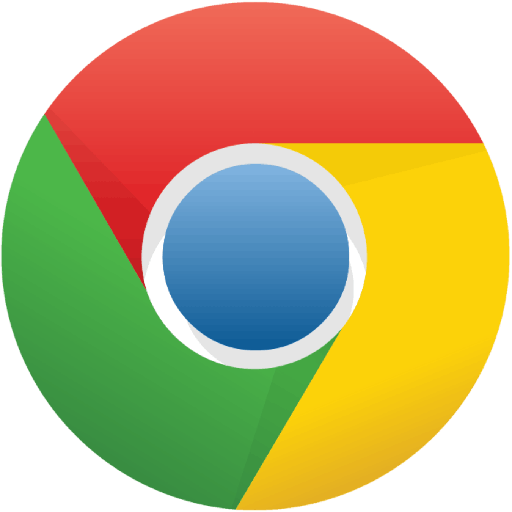

In [1]:
import aug_lib
from PIL import Image

img = Image.open('chrome2x-8bit.png')
img

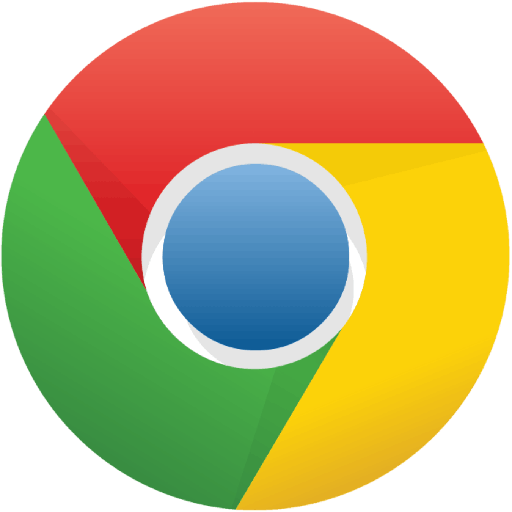

In [20]:
augmenter = aug_lib.TrivialAugment()
aug_img = augmenter(img)
aug_img

In [2]:
aug_lib.set_augmentation_space("deepaugment_cifartop10",31)

In [1]:
import aug_lib

aug_lib.ALL_TRANSFORMS

[<identity>,
 <AutoContrast>,
 <Equalize>,
 <Rotate>,
 <Solarize>,
 <Color>,
 <Posterize>,
 <Contrast>,
 <Brightness>,
 <Sharpness>,
 <ShearX>,
 <ShearY>,
 <TranslateX>,
 <TranslateY>]

In [4]:
aug_lib.ALL_TRANSFORMS

[<identity>, <AutoContrast>]

In [2]:
import torchvision

train_transforms_list = []

train_transforms_list.append(
        [
            torchvision.transforms.RandomCrop(32, padding=4),
            torchvision.transforms.RandomHorizontalFlip(),
        ]
    )

In [3]:
type(train_transforms_list)

list

In [4]:
train_transforms_list[0]

[RandomCrop(size=(32, 32), padding=4), RandomHorizontalFlip(p=0.5)]

In [1]:
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 11.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Preparing metadata (setup.py) ... done
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=17c540997080b474b51b9bc1fee10d622124a3c980659fe35309b31f11c187d0
  Stored in directory: /Users/colins/Library/Caches/pip/wheels/26/9a/dd/2818b1b023daf077ec3e625c47ae446aca587a5abe48e05212
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=169d14a4c11dd88658a23ec5c937e39e8d5998907637d3b91c50acf976588970
  Stored in directory: /Users/colins/Library/Caches/pip/wheels/a1/49/46/1b13a65d8da11238af9616b00fdde6d45b0f95d9291bac8452
Successfully built fire termcolo

In [21]:
import medmnist
print(medmnist.__version__)
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

import medmnist
from medmnist import INFO, Evaluator


2.1.0


In [24]:
data_flag = 'pathmnist'

download = True

NUM_EPOCHS = 3
BATCH_SIZE = 16
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])
# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

Using downloaded and verified file: /Users/colins/.medmnist/pathmnist.npz
Using downloaded and verified file: /Users/colins/.medmnist/pathmnist.npz
Using downloaded and verified file: /Users/colins/.medmnist/pathmnist.npz


In [37]:
batch = next(iter(train_loader))
print (len(batch))
print (batch[0].shape)
print (batch[1].shape)
print (batch[1][0].item())

2
torch.Size([16, 3, 28, 28])
torch.Size([16, 1])
2


In [ ]:
from pl_bolts.datamodules import CIFAR10DataModule


cifar10_dm = CIFAR10DataModule(
    data_dir='./data',
    batch_size=BATCH_SIZE,
    num_workers=1,
    train_transforms=train_transforms
)